In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

## Question 1 ##

### Question 1a ###

Soit $\psi$ une solution au problème de Cauchy considéré. 
Montrons que $\psi$ reste sur la sphère $S^2$ en tous temps. 

Posons la fonction du temps  $g : \mathbb{R} \to \mathbb{R}^+ $, définie sur $\mathbb{R}$ par  $t \mapsto \| \psi(t) \|^2 = \langle \psi(t), \psi(t) \rangle$,  où $\langle \cdot,\cdot \rangle$ est le produit scalaire canonique sur $\mathbb{R}^3$

Le produit scalaire est une application bilinéaire donc de classe $\mathbb{c}^\infty$. D'autre part $\psi$ est dérivable. Donc par composition, $g$ est dérivable sur $\mathbb{R}$, et on a, en utilisant le caractère symétrique du produit scalaire, pour tout $t \in \mathbb{R}$ : 
$$
\dot{g}(t) = \langle \dot{\psi}(t), \psi(t) \rangle + \langle \psi(t), \dot{\psi}(t) \rangle = 2 \langle \dot{\psi}(t), \psi(t) \rangle
$$
Donc pour tout $t \in \mathbb{R}$ : $\dot{g}(t) = 2 \langle r(t) \wedge \psi(t), \psi(t) \rangle$

Or on sait que pour tous vecteurs $u,v \in \mathbb{R}^3$, on a $\langle a \wedge b, b \rangle = 0$, car $a \wedge b$ est par définition orthogonal à $b$.

Donc, sachant $\psi(0)\in S^2$, on a pour tout $t \in \mathbb{R}$ : $g(t) = g(0) = \| \psi(t) \|^2 =  1$

Donc pour tout $t \in \mathbb{R}$ : $\| \psi(t) \|^2 = 1$

Donc $\psi$ reste sur la sphère $S^2$ en tous temps. 

### Question 1b ###

En notant
$\psi = \begin{pmatrix} \psi_x \\ \psi_y \\ \psi_z \end{pmatrix} \in \mathbb{R}^3$, on calcule simplement les produits vectoriels, et on obtient :
$\\e_x \wedge \psi = -\psi_z e_y + \psi_y e_z = \Omega_x \psi$

$\
e_y \wedge \psi = \psi_z e_x - \psi_x e_z = \Omega_y \psi$

$\
e_z \wedge \psi = -\psi_y e_x + \psi_x e_y = \Omega_z \psi$

d'où le résultat souhaité : pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$

## Question 2 ##

In [2]:
E=2
delta=1 
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi*t/T)/(np.pi/T))
psi_0=np.array([0,0,-1])
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])
t_0=0.000001
t_f=20

def f(x,t):
    return(np.dot(E*Omega_z+delta*u(t)*Omega_x,np.transpose(x)))


### Question 2a ###

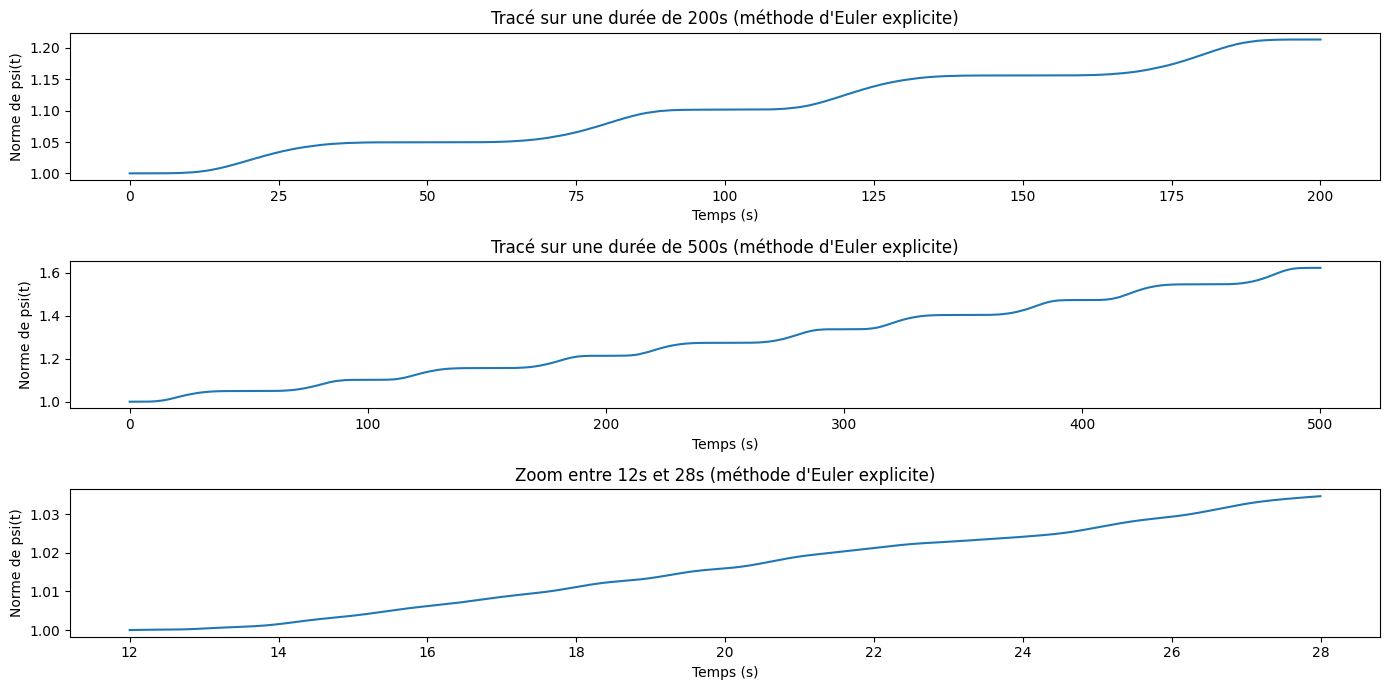

In [3]:
def euler_explicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = f(psi[k-1],tps[k-1])*dt+psi[k-1]
    return(tps,psi)

Résolution_exp_a = euler_explicit(psi_0,0.000001,200,E,delta,dt)
Temps_exp_a = Résolution_exp_a[0]
Norme_psi_exp_a = np.linalg.norm(Résolution_exp_a[1],ord=2,axis=1)

Résolution_exp_b = euler_explicit(psi_0,0.000001,500,E,delta,dt)
Temps_exp_b = Résolution_exp_b[0]
Norme_psi_exp_b = np.linalg.norm(Résolution_exp_b[1],ord=2,axis=1)

Résolution_exp_c = euler_explicit(psi_0,12,28,E,delta,dt)
Temps_exp_c = Résolution_exp_c[0]
Norme_psi_exp_c = np.linalg.norm(Résolution_exp_c[1],ord=2,axis=1)

plt.figure()

plt.subplot(3, 1, 1)
plt.plot(Temps_exp_a,Norme_psi_exp_a)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 200s (méthode d'Euler explicite)")

plt.subplot(3, 1, 2)
plt.plot(Temps_exp_b,Norme_psi_exp_b)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 500s (méthode d'Euler explicite)")

plt.subplot(3, 1, 3)
plt.plot(Temps_exp_c,Norme_psi_exp_c)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom entre 12s et 28s (méthode d'Euler explicite)")

plt.tight_layout()
plt.show()

On observe que la solution explose en temps fini, puisque les capacités de la machine ne sont plus suffisantes pour calculer la norme de $\psi (t)$ au bout de près de 1.1s.
On en déduit que..... 

$\lVert \psi (t) \rVert$ et $\lVert \log (\psi (t)) \rVert$

### Question 2b ###

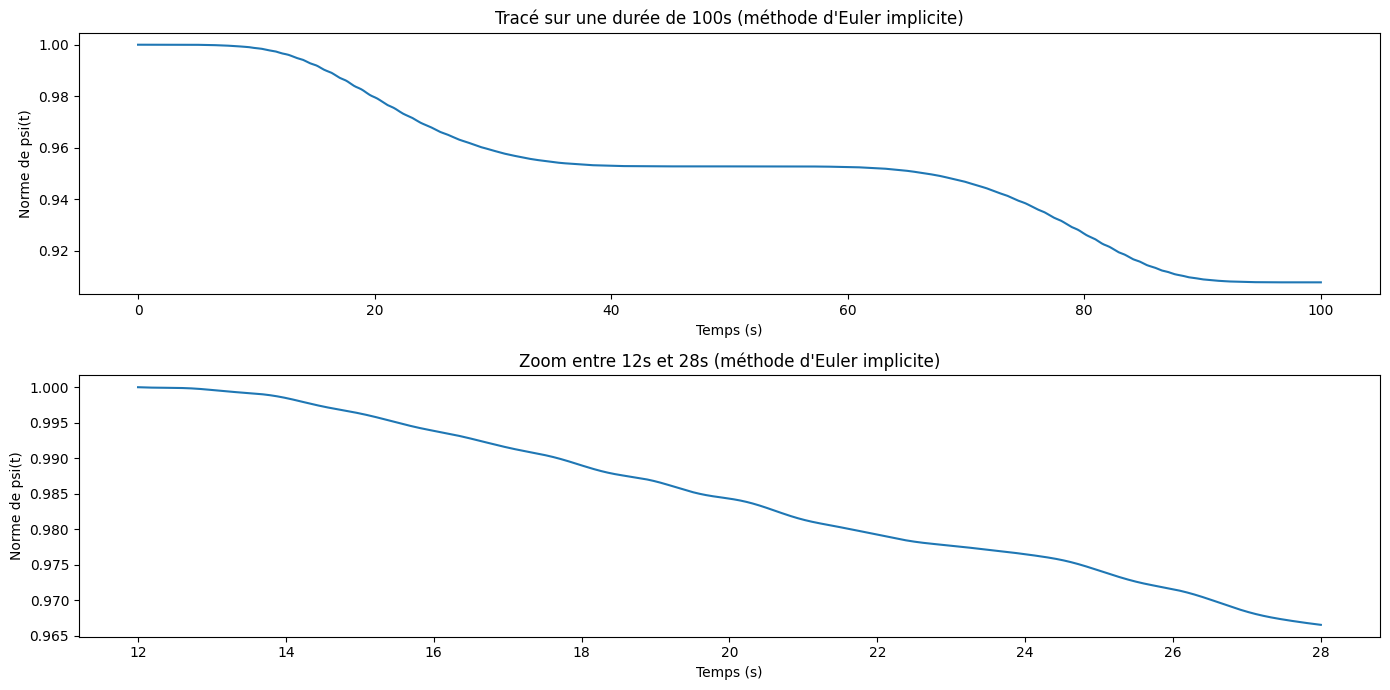

In [ ]:
seuil = 10e-12

# On va définir psi[k] comme le point fixe de la fonction x -> g(k,x), sur laquelle on applique le théorème de Banach.
# On doit prendre un seuil pour calculer ce point fixe dans l'algoritme, tel que la valeur retenue psi[k] est telle que norme(psi[k] - g(k,psi[k]) <= seuil

def euler_implicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    def g(k,x):
        return(psi[k-1]+dt*f(x,tps[k]))
    for k in range(1,n):
        point_fixe = psi[k-1]
        while abs(np.linalg.norm(point_fixe-g(k,point_fixe),ord=2)) > seuil :
            point_fixe = g(k,point_fixe)
        psi[k] = point_fixe
    return(tps,psi)


Résolution_imp_a = euler_implicit(psi_0,0.000001,100,E,delta,dt)
Temps_imp_a = Résolution_imp_a[0]
Norme_psi_imp_a = np.linalg.norm(Résolution_imp_a[1],ord=2,axis=1)

Résolution_imp_c = euler_implicit(psi_0,12,28,E,delta,dt)
Temps_imp_c = Résolution_imp_c[0]
Norme_psi_imp_c = np.linalg.norm(Résolution_imp_c[1],ord=2,axis=1)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(Temps_imp_a,Norme_psi_imp_a)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 100s (méthode d'Euler implicite)")

plt.subplot(2, 1, 2)
plt.plot(Temps_imp_c,Norme_psi_imp_c)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom entre 12s et 28s (méthode d'Euler implicite)")

plt.tight_layout()
plt.show()


Commentaire ???

### Question 2c ###

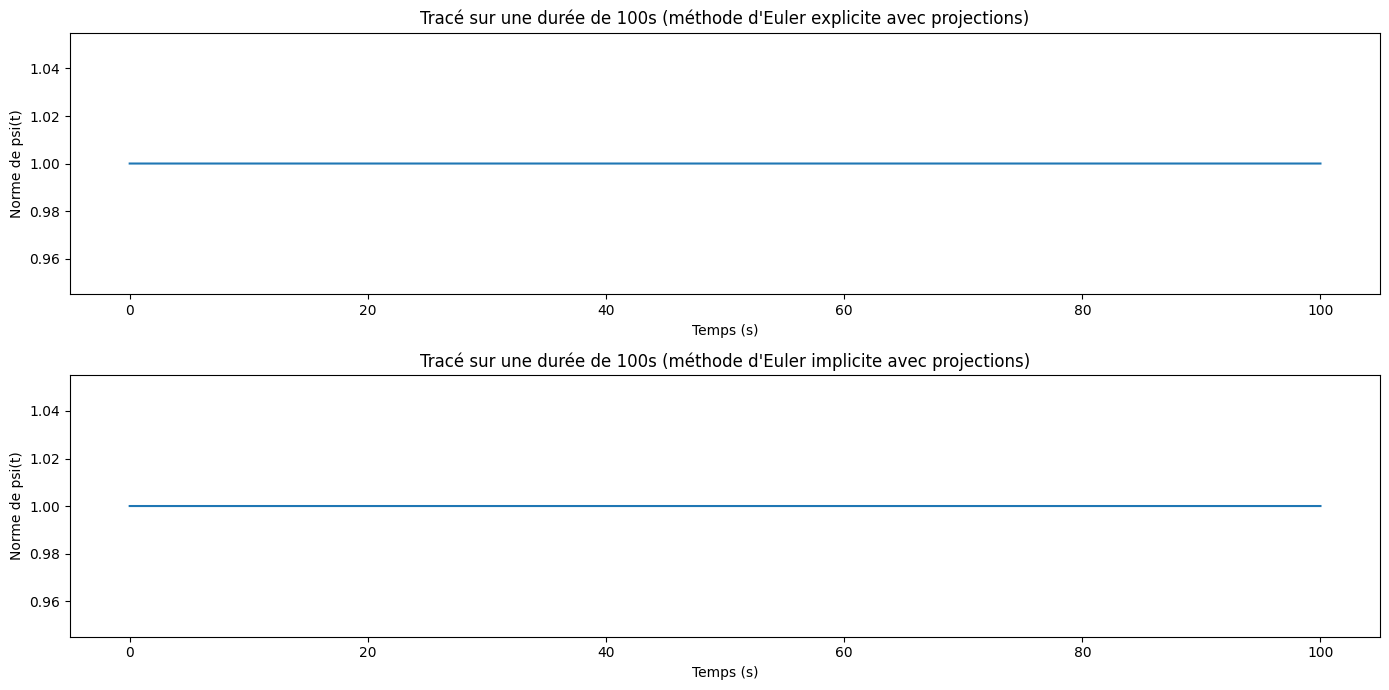

In [7]:
# La projection sur la sphère de l'état au temps k, psi[k] est le vecteur psi[k] normalisé.

def euler_explicit_projection(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = f(psi[k-1],tps[k-1])*dt+psi[k-1]
        if np.linalg.norm(psi[k],ord=2) > 0 :
            psi[k] = (np.linalg.norm(psi[k],ord=2)**(-1))*psi[k]
    return(tps,psi)



def euler_implicit_projection(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    def g(k,x):
        return(psi[k-1]+dt*f(x,tps[k]))
    for k in range(1,n):
        point_fixe = psi[k-1]
        while abs(np.linalg.norm(point_fixe-g(k,point_fixe),ord=2)) > seuil :
            point_fixe = g(k,point_fixe)
        if np.linalg.norm(point_fixe,ord=2) > 0 :
            psi[k] = (np.linalg.norm(point_fixe,ord=2)**(-1))*point_fixe
        else :
            psi[k] = point_fixe
    return(tps,psi)


Résolution_exp_projection = euler_explicit_projection(psi_0,0.000001,100,E,delta,dt)
Temps_exp_projection = Résolution_exp_projection[0]
Norme_psi_exp_projection = np.linalg.norm(Résolution_exp_projection[1],ord=2,axis=1)

Résolution_imp_projection = euler_implicit_projection(psi_0,0.000001,100,E,delta,dt)
Temps_imp_projection = Résolution_imp_projection[0]
Norme_psi_imp_projection = np.linalg.norm(Résolution_imp_projection[1],ord=2,axis=1)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(Temps_exp_projection,Norme_psi_exp_projection)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 100s (méthode d'Euler explicite avec projections)")

plt.subplot(2, 1, 2)
plt.plot(Temps_imp_projection,Norme_psi_imp_projection)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 100s (méthode d'Euler implicite avec projections)")

plt.tight_layout()
plt.show()



On observe que la norme de $\psi (t)$ est bien constante égale à 1 au cours du temps. ET COMPARER ....
On en déduit que..... 

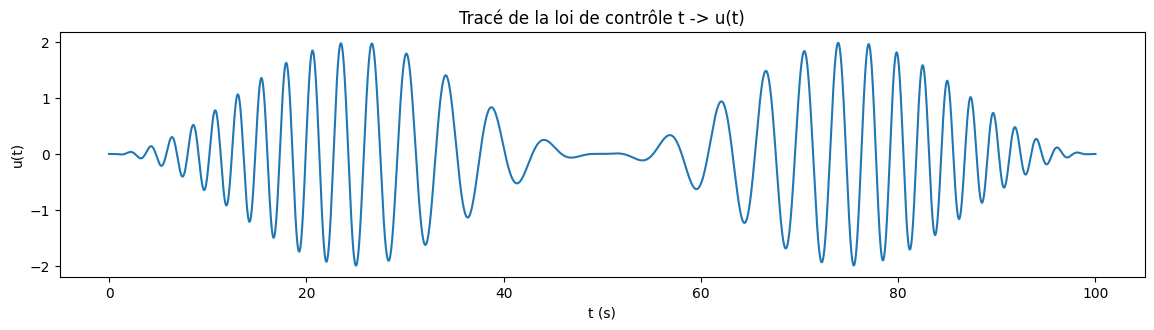

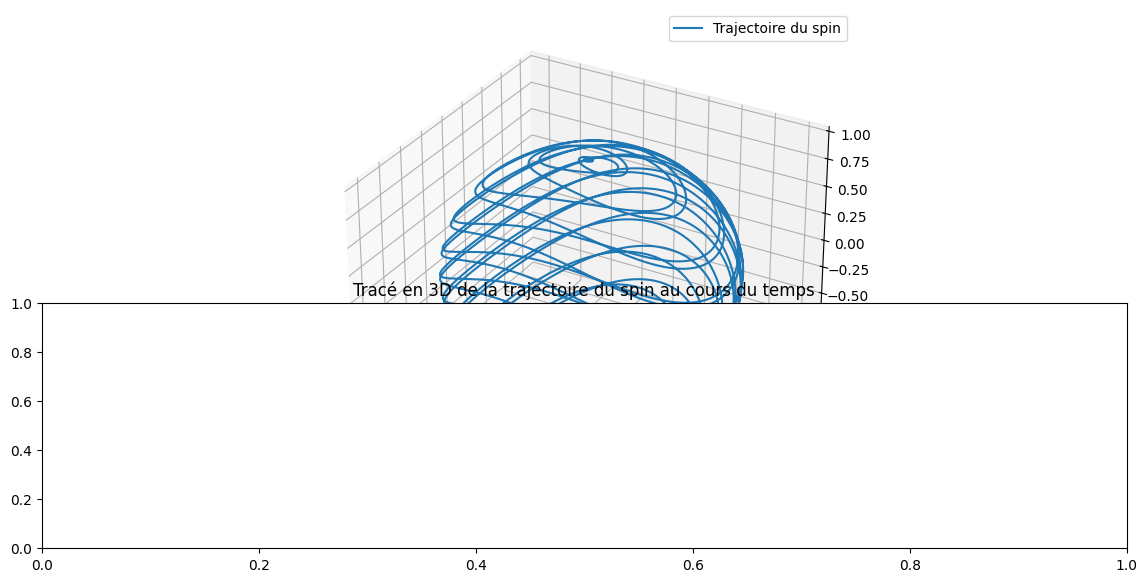

In [34]:
plt.figure()

# Tracé de la loi de contrôle t -> u(t) :

plt.subplot(2, 1, 1)
plt.plot(Temps_exp_projection,u(Temps_exp_projection))
plt.xlabel("t (s)")
plt.ylabel("u(t)")
plt.title("Tracé de la loi de contrôle t -> u(t)")

# Tracé de la trajectoire du spin t -> psi(t) en 3D :

ax = plt.figure().add_subplot(projection='3d')

# On utilise les résultats fournis par la méthode d'Euler explicite qui reprojette l'état sur la sphère à chaque pas de temps
X = Résolution_exp_projection[1][:,0]
Y = Résolution_exp_projection[1][:,1]
Z = Résolution_exp_projection[1][:,2]

plt.subplot(2, 1, 2)
ax.plot(X, Y, Z, label="Trajectoire du spin")
ax.legend()
plt.title("Tracé en 3D de la trajectoire du spin au cours du temps")

plt.show()


COMMENTAIRE ???

## Question 3 ##

In [ ]:
# Laurentin

On vérifie donc que....

## Question 4 ##

### Question 4a ###

### Question 4b ###

### Question 4d ###

### Question 4e ###